##### DBSCAN算法  (任意形状的簇)
1. 无需预设簇数，可处理任意形状簇和噪声。
2. 对参数 ε 和 MinPts 敏感，高维数据效果可能下降
DBSCAN（Density-Based Spatial Clustering of Applications with Noise）是一种基于密度的聚类算法，能够发现任意形状的簇并有效识别噪声点。以下是其核心流程：

**1. 参数设置**
- **邻域半径（ε）**：定义点的邻域范围。
- **最小样本数（MinPts）**：判定核心点的邻域内需包含的最少点数。

**2. 核心概念定义**
- **核心点（Core Point）**：若某点的 ε 邻域内至少有 `MinPts` 个点（包括自身），则为核心点。
- **边界点（Border Point）**：非核心点，但位于某个核心点的 ε 邻域内。
- **噪声点（Noise Point）**：既非核心点，也不属于任何核心点邻域的点。

**3. 算法流程**
**初始化**  
   所有点标记为 **未访问（unvisited）**。
**遍历所有点**  
   对每个未访问的点 `p`，执行以下操作：
   - **标记为已访问**。
   - **计算 ε 邻域内的点数**，记为 `Nε(p)`。
**判断核心点**  
   - 若 `|Nε(p)| ≥ MinPts`：
     - 创建一个新簇 `C`，将 `p` 加入 `C`。
     - **扩展簇**：递归地将 `p` 的 ε 邻域内所有 **未访问点** 加入 `C`，并重复判断这些点是否为核心点以继续扩展。
   - 若 `|Nε(p)| < MinPts`：
     - 暂时标记 `p` 为 **噪声点**（后续可能被其他簇吸收为边界点）。
**终止条件**  
   重复步骤 2-3，直到所有点被访问。
**噪声点处理**  
   所有未被任何簇包含的点最终标记为噪声。



 **4. 关键机制**
- **密度直达（Directly Density-Reachable）**：若 `q` 在 `p` 的 ε 邻域内且 `p` 是核心点，则 `q` 从 `p` 密度直达。
- **密度可达（Density-Reachable）**：通过一系列密度直达关系连接的点。
- **密度相连（Density-Connected）**：若存在点 `o`，使得 `p` 和 `q` 都从 `o` 密度可达，则 `p` 和 `q` 密度相连。




In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# epsilon  minpts

##### 创建聚类数据集

In [4]:
from sklearn.datasets import make_blobs
blob_centers = np.array(
    [
        [0.2,2.3],
        [-1.5,2.3],
        [-2.8,1.8],
        [-2.8,2.8],
        [-2.8,1.3],
    ]
)
blob_std = np.array([0.4,0.3,0.1,0.1,0.1])
X,y = make_blobs(n_samples=2000,centers=blob_centers,
                cluster_std=blob_std,random_state=7)

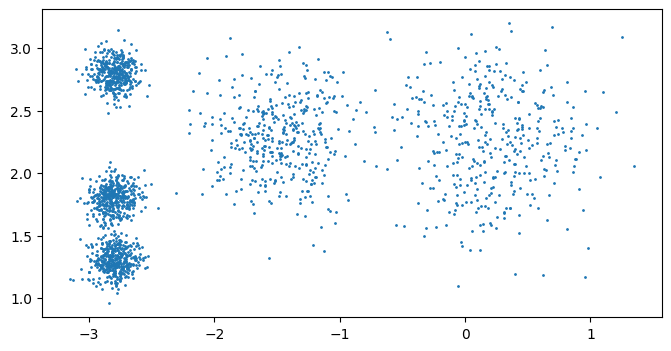

In [ ]:
def plot_clustres(X,y=None):
    # s:size 
    plt.scatter(X[:,0],X[:,1],c=y,s=1)
plt.figure(figsize=(8,4))
plot_clustres(X)
plt.show()

In [7]:
from sklearn.cluster import KMeans , DBSCAN

kmeans = KMeans(n_clusters=5,random_state=42)
y_pred = kmeans.fit_predict(X)

kmeans.fit_predict(X) 与 kmeans.labels_ 结果一致

In [9]:
y_pred = kmeans.fit_predict(X)
y_pred

array([2, 2, 4, ..., 1, 4, 2], dtype=int32)

In [10]:
kmeans.labels_

array([2, 2, 4, ..., 1, 4, 2], dtype=int32)